In [1]:
words = open('names.txt').read().splitlines()
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [29]:
#Let's create bigrams
b = {}
for w in words:
    nw = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(nw, nw[1:], nw[2:]):
        bigram = ch1 + ch2
        trigram = (bigram, ch3)
        b[trigram] = b.get(trigram, 0) + 1

uniq = set()

for x, y in b.keys():
    uniq.add(x)

unique = sorted(list(uniq))
# unique


#Itos
alphas = sorted(list(set(''.join(words))))
itos = {i:s for i,s in enumerate(alphas)}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z'}

In [20]:
import torch
N = torch.zeros((27, len(uniq)), dtype=torch.int32)
N

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)

In [58]:
#Map the entries to the count of the number of alphabets that follow a pair of letters
for i,l in enumerate(unique):
    for j,s in itos.items():
        N[j,i] = b.get((l, s), 0)

N[:, :12]

tensor([[ 207,  169,  628,  700,   23,  158,  136,  505,    9, 1255, 1254,  463],
        [ 190,    0,    0,    0,   15,    0,    0,    0,   12,    1,    0,    0],
        [  31,    0,    0,    0,    4,    0,    0,    0,    6,    3,    2,    0],
        [ 366,    0,    0,    0,   80,    0,    0,    0,   21,    2,    2,    0],
        [  55,  253,   65,  524,    9,   49,  110,  151,    1,  403,  601,  366],
        [  21,    0,    0,    0,   10,    1,    0,    0,   10,    0,    0,    0],
        [  17,    0,    0,    0,    6,    0,    0,    0,    4,    0,    0,    0],
        [  91,    9,  352,   32,    9,    0,   10,    0,    5,   41,  240,    0],
        [ 154,   41,   44,  130,   54,   71,  128,   55,    1,   73,  250,  269],
        [  27,    1,    2,    6,    3,    0,    0,    0,    0,    1,    2,    1],
        [  75,    0,    0,    2,    8,    0,    0,    0,   17,    1,    0,    0],
        [ 632,   85,   68,    2,  488,   20,   18,    0,   67,    4,   30,    7],
        [ 384,  

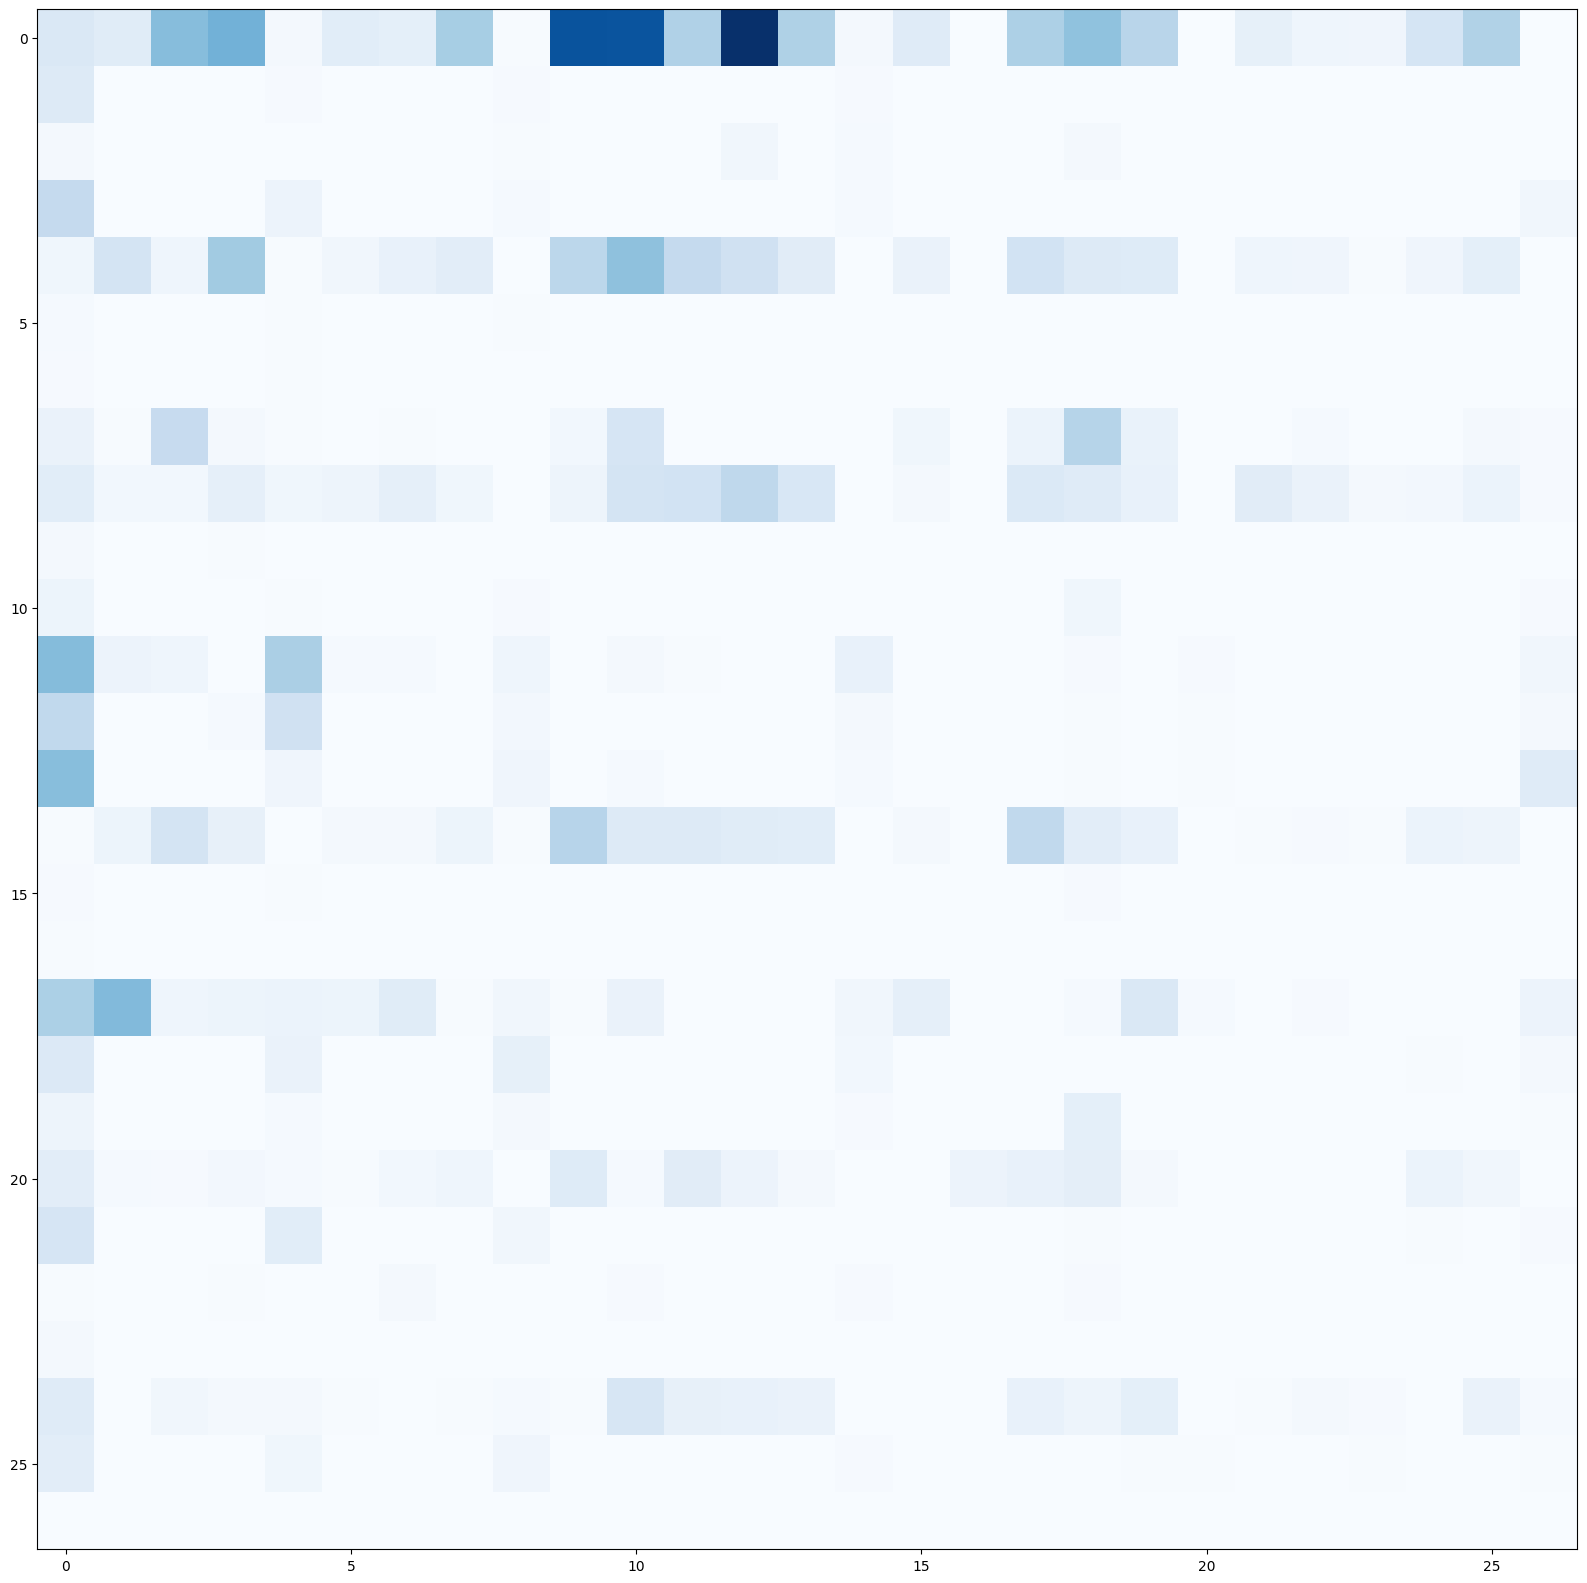

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(N[:, :27], cmap='Blues')